<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [3]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [4]:
# Read from Data tab associated with project; insert to code 
# Once completed delete as it contains credentials
df = pd.read_csv('dataset_part_2.csv')
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,...,ReusedCount,Serial,Longitude,Latitude,LandingAttempt,lpLongitude,lpLatitude,LandingPadName,LandingPadType,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,...,0,B0003,-80.577366,28.561857,False,NaN,NaN,NaN,NaN,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,...,0,B0005,-80.577366,28.561857,False,NaN,NaN,NaN,NaN,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,...,0,B0007,-80.577366,28.561857,False,NaN,NaN,NaN,NaN,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,...,0,B1003,-120.610829,34.632093,True,NaN,NaN,NaN,NaN,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,...,0,B1004,-80.577366,28.561857,False,NaN,NaN,NaN,NaN,0


In [3]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'LandingAttempt', 'lpLongitude', 'lpLatitude', 'LandingPadName',
       'LandingPadType', 'Class'],
      dtype='object')

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


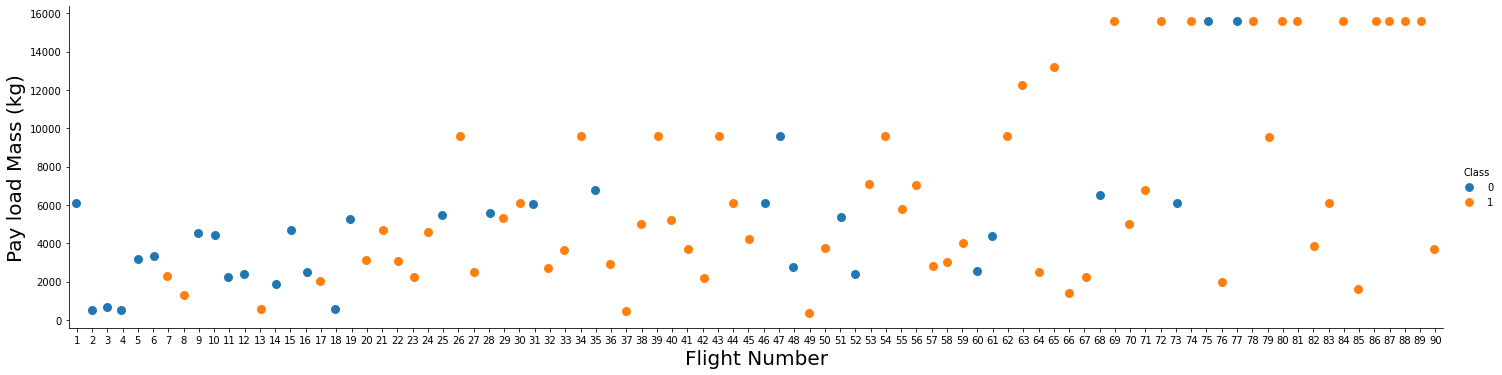

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=4, s=9)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


In [5]:
df.groupby('LaunchSite')['Class'].mean()

LaunchSite
CCSFS SLC 40    0.600000
KSC LC 39A      0.772727
VAFB SLC 4E     0.769231
Name: Class, dtype: float64

With only the attempted landings we find that the success rate dramatically improves by flight number 20 and the actual success rates are much higher; <code>CCAFS LC-40</code>, has a success rate of 80 %, <code>VAFB SLC 4E</code> has a success rate of 83%, and <code>KSC LC-39A</code> has a success rate of 94%.

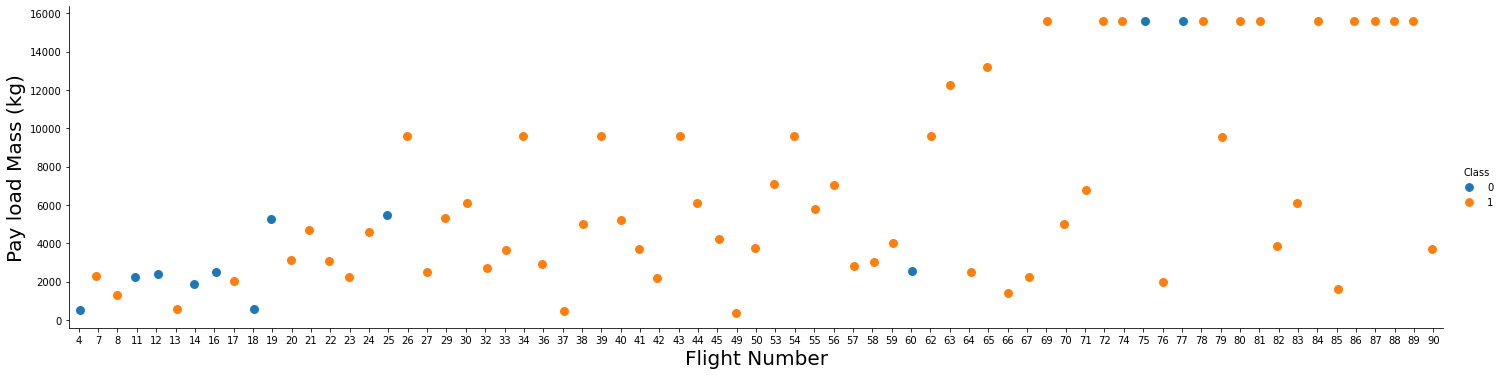

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df[df.LandingAttempt==True], aspect=4, s=9)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [7]:
df[df.LandingAttempt==True].groupby('LaunchSite')['Class'].mean()

LaunchSite
CCSFS SLC 40    0.804878
KSC LC 39A      0.944444
VAFB SLC 4E     0.833333
Name: Class, dtype: float64

There are many factors in play to determine if the first stage will succesfully land but these include;
- The failure rate due to accidents or system failures
- Various combination of features in the launch that would make a return impossible resulting in the decision not to attempt a landing

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


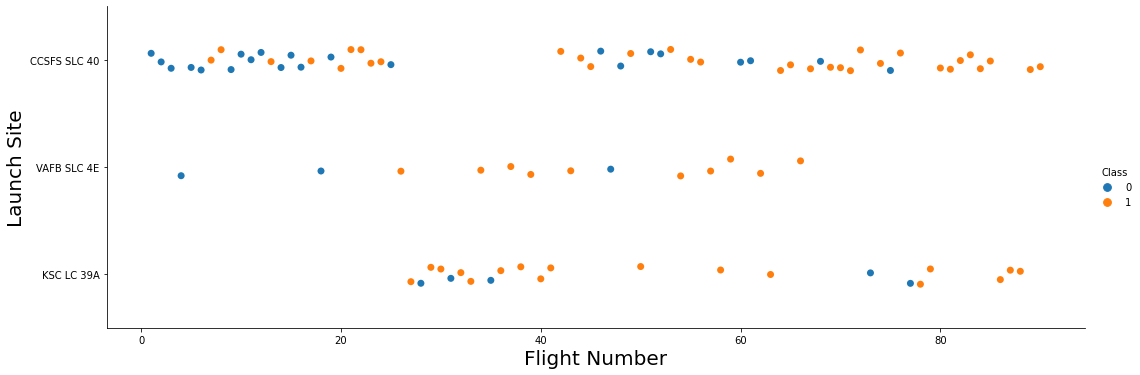

In [86]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=3, s=7)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.

- CCAFS LC-40: Has an overall success rate of 60 %, however, it has the most launches and outcomes have improved with experience/flights 

- VAFB SLC 4E: After a couple of initial failures the site has been succesfull (may be biased by the smaller number of attempts)

- KSC LC-39A:  The distribution of failues appears to be more evenly spread out but generally more succesfull with more attempts


Considering attempted landings

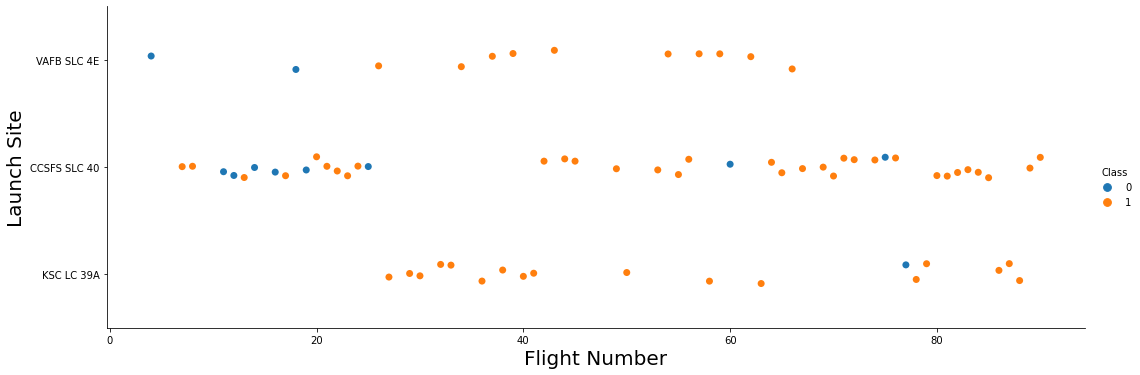

In [85]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df[df.LandingAttempt==True], aspect=3, s=7)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

This suggests

- A limited number of unintended unsuccessfull landings have occured after flight number 20 

- CCSFS LC-40: Has an overall success rate of 80%, it has the most launches and outcomes have improved with experience/flights 

- VAFB SLC 4E: After a couple of initial failures the site has been succesfull.

- KSC LC-39A:  has has a single unintended failed landing attempt


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


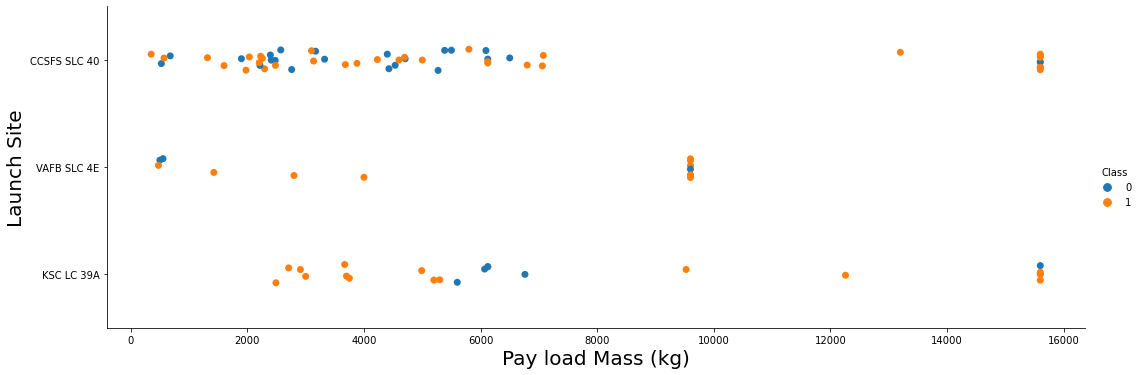

In [84]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=3, s=7)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

- CCAFS LC-40: Mass is not altering class under 8000 kg but highly succesfull over this value 

- VAFB SLC 4E: Successfull regardless of payload

- KSC LC-39A:  negative outcomes (failures) are clustered around a payload mass of 6000 kg

Removing launches where no landing was attempted

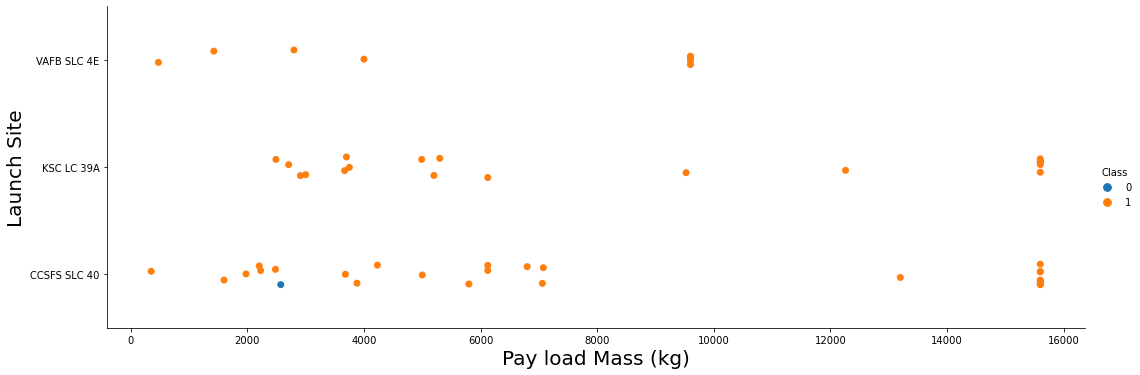

In [156]:
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df[(df.LandingAttempt==True)&(df.FlightNumber>25)], aspect=3, s=7)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

The same trends exist as noted above, however there is no cluster of failures at 6000kg for KSC LC 39A

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


<AxesSubplot:xlabel='Orbit'>

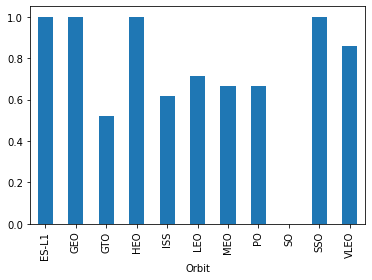

In [11]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit_sucess=df.groupby('Orbit')['Class'].mean()
orbit_sucess.plot.bar()

This can also be visualized by the number of attempts to get a sense of the confidence level of the outcome

<AxesSubplot:xlabel='Orbit'>

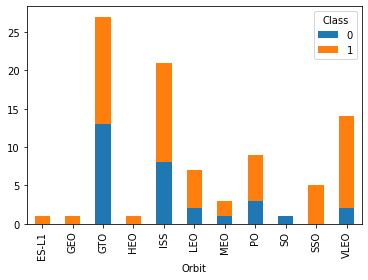

In [32]:
orbit_success_counts = df.groupby('Orbit')['Class'].value_counts()
orbit_success_counts.unstack().plot.bar(stacked=True)

The result really should filter attempts where SpaceX did not attempt a landing

<AxesSubplot:xlabel='Orbit'>

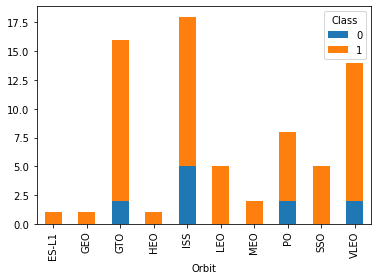

In [159]:
orbit_success_counts = df[df.LandingAttempt==True].groupby('Orbit')['Class'].value_counts()
orbit_success_counts.unstack().plot.bar(stacked=True)

Filtering to attempted landings the success rate by orbit is

In [37]:
df[df.LandingAttempt==True].groupby('Orbit')['Class'].mean()

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.875000
HEO      1.000000
ISS      0.722222
LEO      1.000000
MEO      1.000000
PO       0.750000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


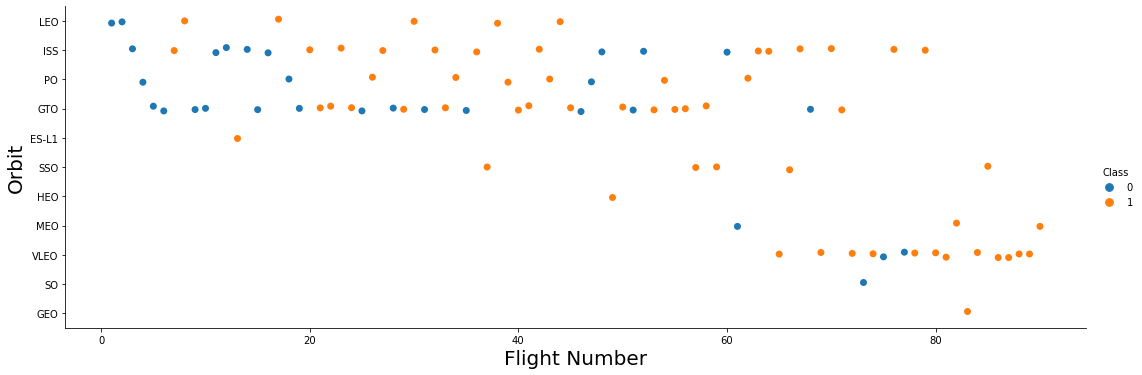

In [82]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=3, s=7)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


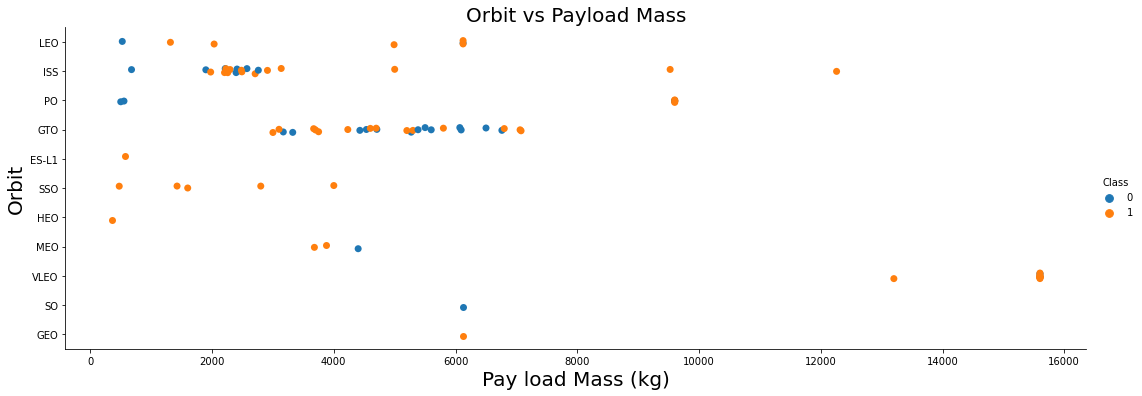

In [5]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=3, s=7)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.title("Orbit vs Payload Mass",fontsize=20)
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


If a landing is attempted it may or may not be succesfull.  If no landing is attempted it could be an indication that physics will not permit it to occur.  

We can also consider the landing attempt rate by orbit filtering out the succesfull landings

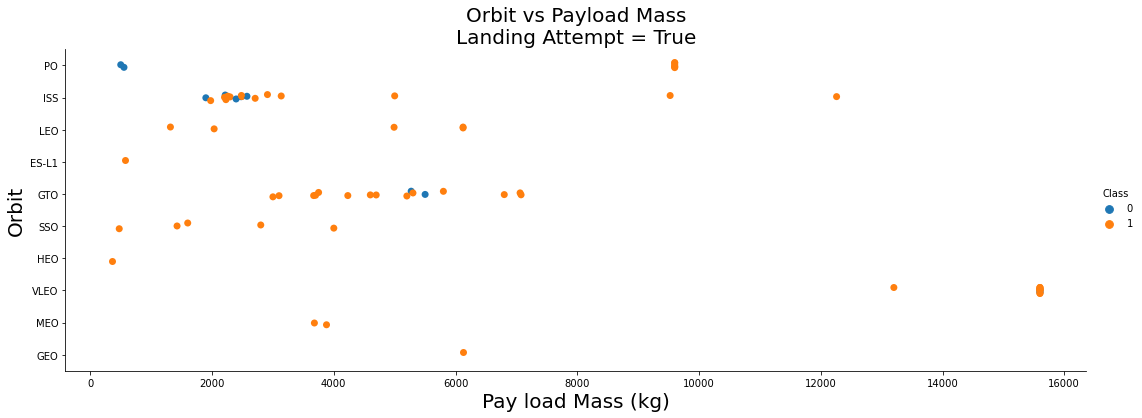

In [7]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df[(df.LandingAttempt==True)], aspect=3, s=7)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.title("Orbit vs Payload Mass\nLanding Attempt = True",fontsize=20)
plt.show()


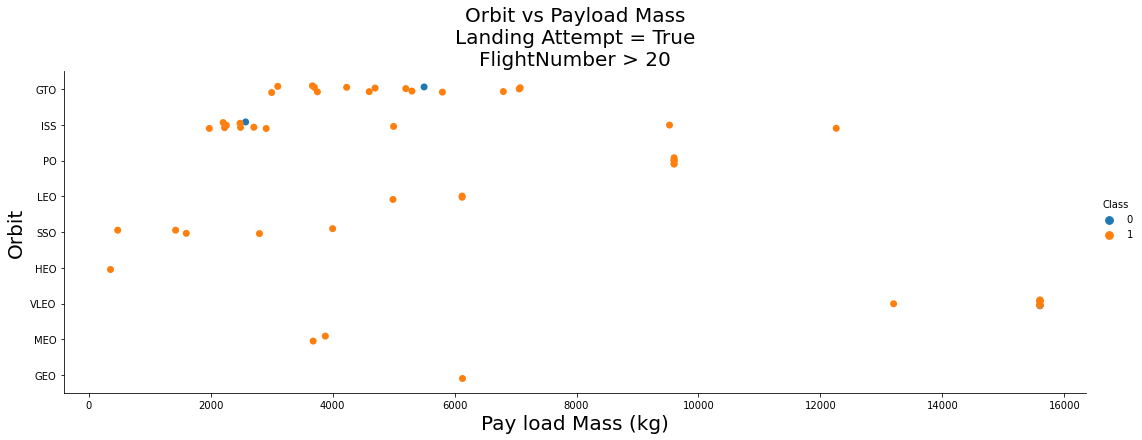

In [8]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df[(df.LandingAttempt==True) & (df.FlightNumber>20)], aspect=3, s=7)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.title("Orbit vs Payload Mass\nLanding Attempt = True\nFlightNumber > 20",fontsize=20)
plt.show()

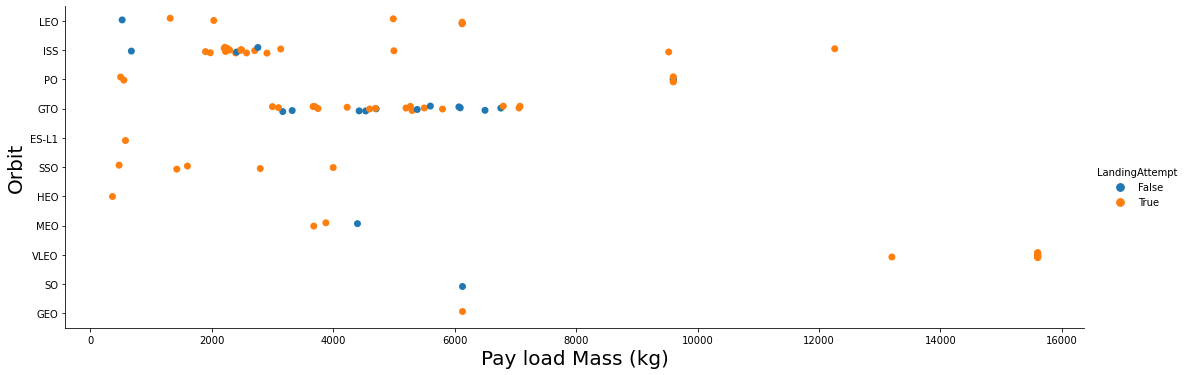

In [79]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="PayloadMass", y="Orbit", hue="LandingAttempt", data=df, aspect=3, s=7)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

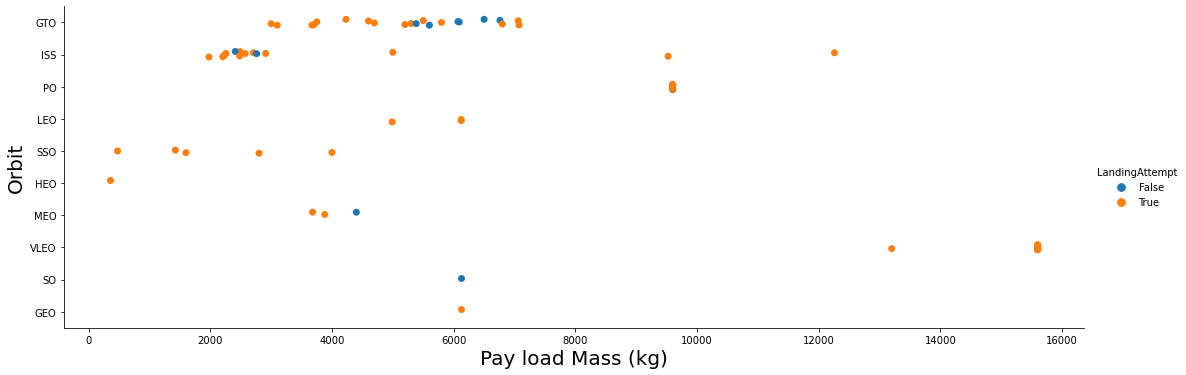

In [80]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="PayloadMass", y="Orbit", hue="LandingAttempt", data=df[df['FlightNumber']>20], aspect = 3, s=7)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

In [50]:
df.groupby('Orbit')['LandingAttempt'].mean()

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.592593
HEO      1.000000
ISS      0.857143
LEO      0.714286
MEO      0.666667
PO       0.888889
SO       0.000000
SSO      1.000000
VLEO     1.000000
Name: LandingAttempt, dtype: float64

<AxesSubplot:xlabel='Orbit'>

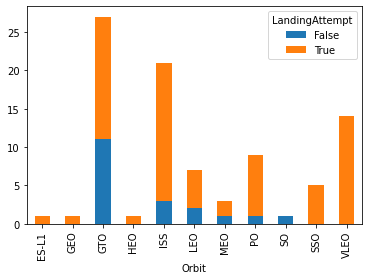

In [94]:
orbit_success_counts = df.groupby('Orbit')['LandingAttempt'].value_counts()
orbit_success_counts.unstack().plot.bar(stacked=True)

Text(6.799999999999997, 0.5, 'Frequency')

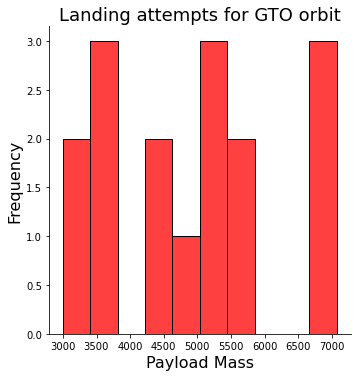

In [147]:
sns.displot(df[(df.Orbit=='GTO') & (df.LandingAttempt==True)]['PayloadMass'], kde=False, color='red', bins=10)
plt.title('Landing attempts for GTO orbit', fontsize=18)
plt.xlabel('Payload Mass', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [106]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'LandingAttempt', 'lpLongitude', 'lpLatitude', 'LandingPadName',
       'LandingPadType', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='GridFins'>

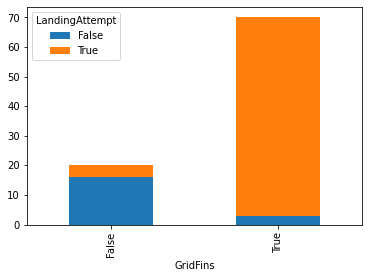

In [116]:
orbit_success_counts = df.groupby('GridFins')['LandingAttempt'].value_counts()
orbit_success_counts.unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='Legs'>

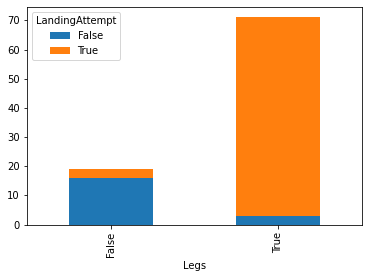

In [118]:
orbit_success_counts = df[df.FlightNumber>0].groupby('Legs')['LandingAttempt'].value_counts()
orbit_success_counts.unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='Reused'>

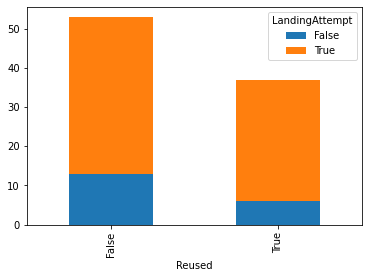

In [133]:
orbit_success_counts = df[df.FlightNumber>0].groupby('Reused')['LandingAttempt'].value_counts()
orbit_success_counts.unstack().plot.bar(stacked=True)

In [121]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'LandingAttempt', 'lpLongitude', 'lpLatitude', 'LandingPadName',
       'LandingPadType', 'Class'],
      dtype='object')

ReusedCount
0     0.300000
1     0.826087
2     0.666667
3     0.750000
4     0.750000
5     1.000000
8     1.000000
9     1.000000
12    1.000000
Name: Class, dtype: float64

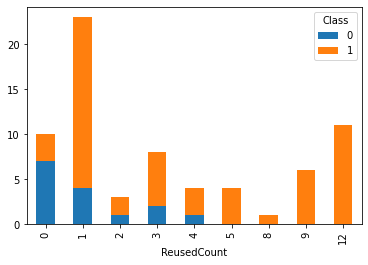

In [131]:
orbit_success_counts = df[df.FlightNumber>20].groupby('ReusedCount')['Class'].value_counts()
orbit_success_counts.unstack().plot.bar(stacked=True)
df[df.FlightNumber>20].groupby('ReusedCount')['Class'].mean()

The number of flights towards a given orbit may also correlate with success.  The core may also be more likely to fail if it has been used several times.

### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [10]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

df['Year']=Extract_year(df['Date'])

Text(0, 0.5, 'Success Rate')

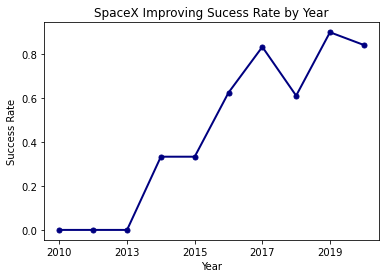

In [11]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
ax = df.groupby('Year')['Class'].mean().plot(lw=2, colormap='jet', marker='.', markersize=10, 
                                             title='SpaceX Improving Sucess Rate by Year')
ax.set_xlabel("Year")
ax.set_ylabel("Success Rate")


you can observe that the sucess rate since 2013 kept increasing till 2020


Year
2013    0.000000
2014    0.666667
2015    0.400000
2016    0.625000
2017    1.000000
2018    0.916667
2019    1.000000
2020    0.888889
Name: Class, dtype: float64

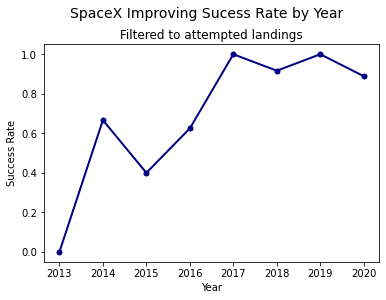

In [14]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
ax = df[df.LandingAttempt==True].groupby('Year')['Class'].mean().plot(lw=2, colormap='jet', marker='.', markersize=10, 
                                             title='Filtered to attempted landings')
ax.set_xlabel("Year")
ax.set_ylabel("Success Rate")
plt.suptitle('SpaceX Improving Sucess Rate by Year', y=1.01, fontsize=14)
#plt.title(subtitle_string, fontsize=10)
df[df.LandingAttempt==True].groupby('Year')['Class'].mean()

<AxesSubplot:title={'center':'SpaceX Launch failures (0) and successes (1)\nfiltered to Attempted Landings'}, xlabel='Year'>

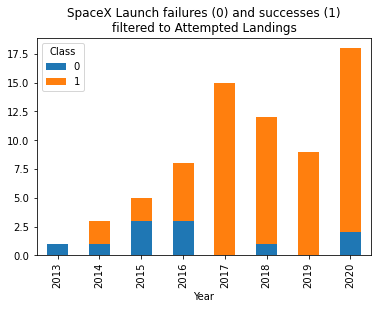

In [234]:
number_of_launches = df[df.LandingAttempt==True].groupby('Year')['Class'].value_counts()
number_of_launches.unstack().plot.bar(title='SpaceX Launch failures (0) and successes (1)\nfiltered to Attempted Landings',stacked=True)


<AxesSubplot:>

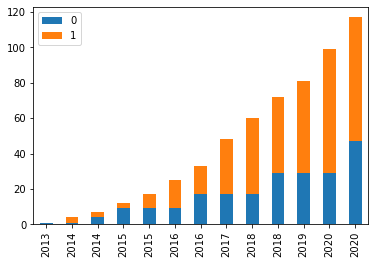

In [261]:
# Cumulative failures and successes with year
cumulative = {}
zeros=0
ones=0

zeros_list=[]
ones_list=[]
yyears=[]
number_of_launches = df[df.LandingAttempt==True].groupby('Year')['Class'].value_counts()

for v in number_of_launches.keys():
    for w in number_of_launches[v[0]]:
        if v[1]==0:
            zeros+=w
            cumulative[v[0]]={'class':v[1],'cumulative number':zeros}
        else:
            ones+=w
            cumulative[v[0]]={'class':v[1],'cumulative number':ones}
    yyears.append(v[0])
    zeros_list.append(zeros)
    ones_list.append(ones)

zeros_list,ones_list,yyears
cumulative_df = pd.DataFrame(list(zip(zeros_list,ones_list)), index=yyears,columns =['0','1'])
cumulative_df.plot(kind='bar', stacked=True)

### Some additional considerations

- The amount of fuel remaining will impact the landing success rate

- The amount of fuel required will be a function of payload mass and the orbit
    - The amount of fuel required will depend o the orbits inclination and the latitude of the launch site

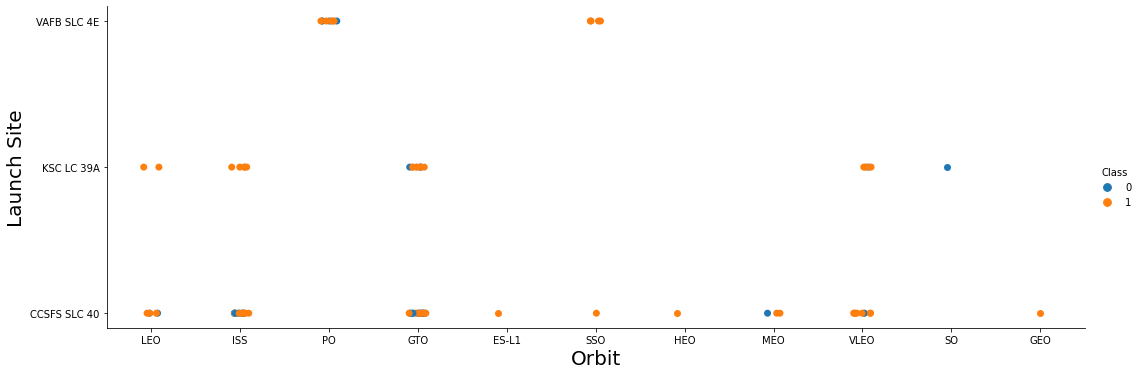

In [137]:
sns.catplot(y="LaunchSite", x="Orbit", hue="Class", data=df, aspect = 3,s=7)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

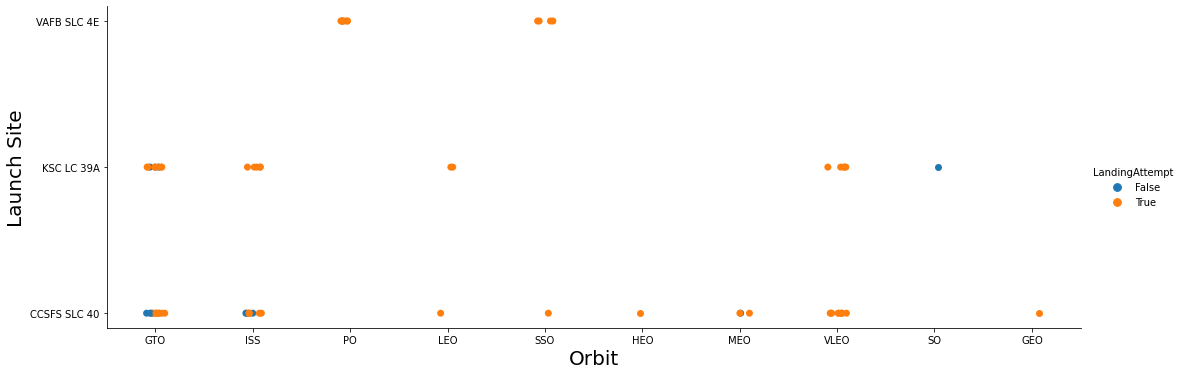

In [269]:
sns.catplot(y="LaunchSite", x="Orbit", hue="LandingAttempt", data=df[df.FlightNumber>20], aspect = 3,s=7)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

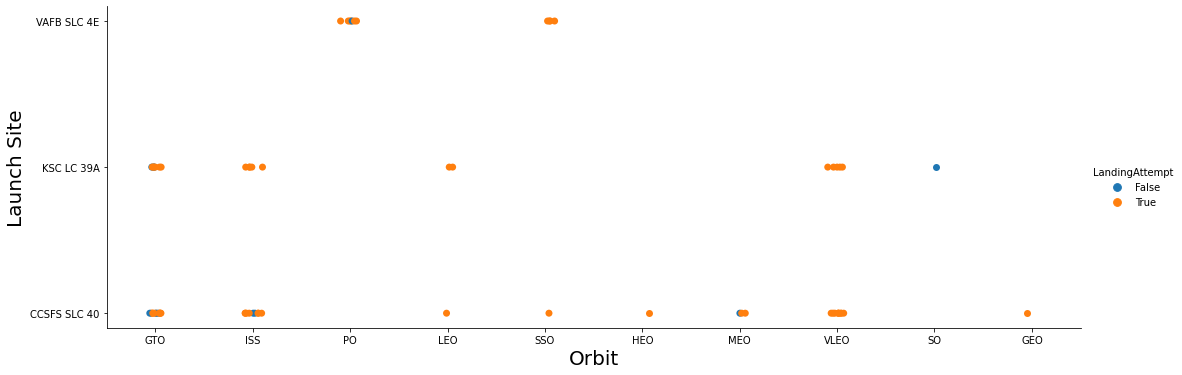

In [296]:
sns.catplot(y="LaunchSite", x="Orbit", hue="LandingAttempt", data=df[df.FlightNumber>20], aspect = 3,s=7)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
#plt.show()

#sns.scatterplot(data=df, x="Orbit", y="LaunchSite", size="PayloadMass", hue='LandingAttempt', legend=False, sizes=(20, 2000))
#sns.stripplot(x="Orbit", y="LaunchSite", hue='LandingAttempt', data=df, jitter=0.3)
#sns.despine()
# show the graph
plt.show()

#***********************************************************
#For given orbit; try depends on launchsite and payloadmass?

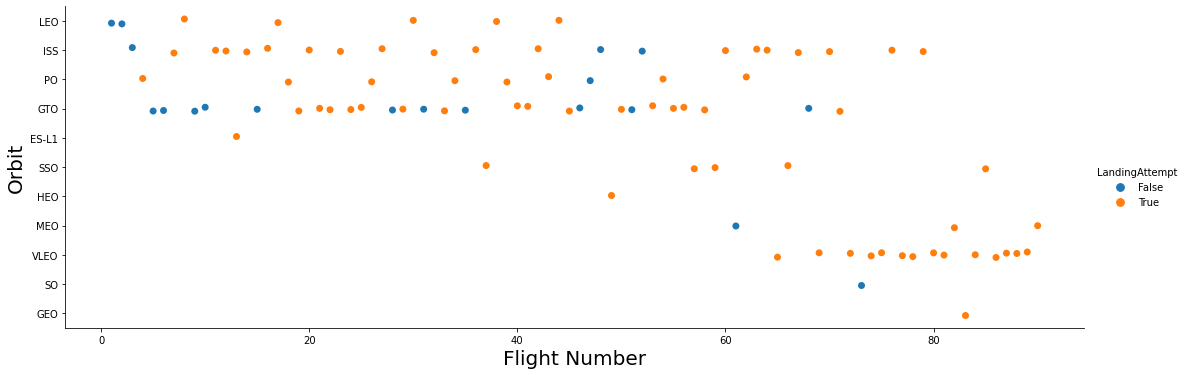

In [138]:
sns.catplot(y="Orbit", x="FlightNumber", hue="LandingAttempt", data=df, aspect = 3,s=7)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

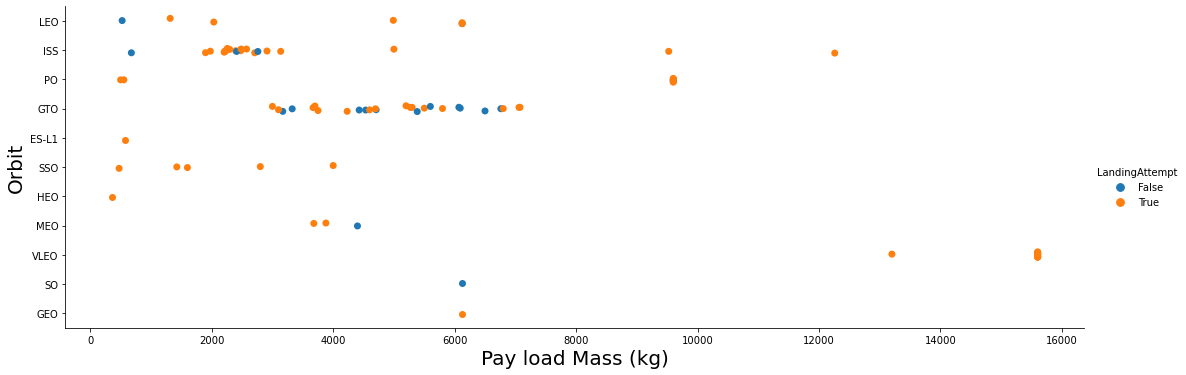

In [139]:
sns.catplot(x="PayloadMass", y="Orbit", hue="LandingAttempt", data=df, aspect = 3, s=7)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

In [25]:
df.groupby('Orbit')['Class'].mean()

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

<AxesSubplot:xlabel='Orbit'>

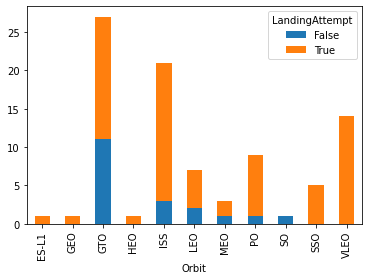

In [33]:
orbit_success_counts = df.groupby('Orbit')['LandingAttempt'].value_counts()
orbit_success_counts.unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='Orbit'>

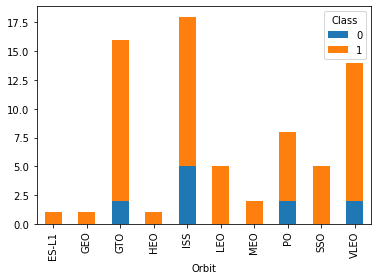

In [34]:
orbit_success_counts = df[df.LandingAttempt==True].groupby('Orbit')['Class'].value_counts()
orbit_success_counts.unstack().plot.bar(stacked=True)

In [23]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'LandingAttempt', 'lpLongitude', 'lpLatitude', 'LandingPadName',
       'LandingPadType', 'Class'],
      dtype='object')

## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [140]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'LandingAttempt']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,LandingAttempt
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003,False
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005,False
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007,False
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003,True
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004,False


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [144]:
# HINT: Use get_dummies() function on the categorical columns

features_one_hot = pd.get_dummies(df[['Orbit','LaunchSite','LandingPad','Serial']])
features_one_hot[['FlightNumber','PayloadMass','Flights','GridFins','Reused',
                  'Legs','Block','ReusedCount','LandingAttempt']]=features[['FlightNumber','PayloadMass',
                                                           'Flights','GridFins','Reused',
                                                           'Legs','Block','ReusedCount','LandingAttempt']]
features_one_hot.head()



,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1062,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,LandingAttempt
0,0,0,0,0,0,1,0,0,0,0,...,0,1,6123.547647,1,False,False,False,1.0,0,False
1,0,0,0,0,0,1,0,0,0,0,...,0,2,525.000000,1,False,False,False,1.0,0,False
2,0,0,0,0,1,0,0,0,0,0,...,0,3,677.000000,1,False,False,False,1.0,0,False
3,0,0,0,0,0,0,0,1,0,0,...,0,4,500.000000,1,False,False,False,1.0,0,True
4,0,0,1,0,0,0,0,0,0,0,...,0,5,3170.000000,1,False,False,False,1.0,0,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [145]:
# HINT: use astype function
features_one_hot=features_one_hot.astype(float)
features_one_hot.dtypes

Orbit_ES-L1       float64
Orbit_GEO         float64
Orbit_GTO         float64
Orbit_HEO         float64
Orbit_ISS         float64
                   ...   
Reused            float64
Legs              float64
Block             float64
ReusedCount       float64
LandingAttempt    float64
Length: 81, dtype: object

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [146]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |
| 2020-11-10        | 1.1     | Nayef         | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
